<a href="https://colab.research.google.com/github/Francelmo/projetoClassificadorAM/blob/main/Projeto_3%C2%AA_Unidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 3ª Unidade: Classificador

## **Componentes:**

## Francelmo Guimarães de Farias
## Micaelli de Sales Santos


O código presente neste notebook mostra as comparação entre a implementação do classificador Random Forest com o classificador de Redes Neurais. Utilizando uma base de dados do enem 2022.


# Microdados Enem 2022


# 1. Exploração dos Dados:

In [ ]:
!pip install scikeras

# Importação de Bibliotecas:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Coleta de Dados:
url = 'https://raw.githubusercontent.com/Francelmo/projetoAM/main/dataset/microdadoenem2022.csv'
df = pd.read_csv(url, sep=';')

## Análise dos Dados

In [ ]:
df.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,NU_NOTA_GERAL,Q001,Q002,Q003,Q004,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,2,1,NaN,A,A,A,B,...,B,A,A,A,A,A,A,A,A,A
1,14,M,2,1,1,NaN,D,D,E,E,...,E,E,B,E,B,B,E,B,E,B
2,5,F,1,2,1,558.2,E,F,A,D,...,A,A,A,A,A,A,C,A,A,B
3,6,M,1,3,1,394.6,C,A,A,B,...,B,A,A,C,A,A,C,B,B,B
4,4,M,0,3,1,NaN,D,B,A,B,...,A,A,A,A,A,A,B,A,A,A


In [ ]:
df

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,NU_NOTA_GERAL,Q001,Q002,Q003,Q004,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,2,1,NaN,A,A,A,B,...,B,A,A,A,A,A,A,A,A,A
1,14,M,2,1,1,NaN,D,D,E,E,...,E,E,B,E,B,B,E,B,E,B
2,5,F,1,2,1,558.2,E,F,A,D,...,A,A,A,A,A,A,C,A,A,B
3,6,M,1,3,1,394.6,C,A,A,B,...,B,A,A,C,A,A,C,B,B,B
4,4,M,0,3,1,NaN,D,B,A,B,...,A,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8,M,1,1,1,529.7,H,E,F,C,...,A,A,B,B,A,A,D,A,B,B
1048571,3,F,1,3,1,528.3,E,E,C,B,...,A,A,A,C,A,A,E,A,B,B
1048572,3,M,1,1,2,538.1,H,H,C,F,...,B,A,B,B,A,A,A,A,B,B
1048573,2,F,1,3,3,662.4,E,E,C,B,...,A,A,A,B,A,A,D,A,A,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP_FAIXA_ETARIA  1048575 non-null  int64  
 1   TP_SEXO          1048575 non-null  object 
 2   TP_ESTADO_CIVIL  1048575 non-null  int64  
 3   TP_COR_RACA      1048575 non-null  int64  
 4   TP_ESCOLA        1048575 non-null  int64  
 5   NU_NOTA_GERAL    785428 non-null   float64
 6   Q001             1048575 non-null  object 
 7   Q002             1048575 non-null  object 
 8   Q003             1048575 non-null  object 
 9   Q004             1048575 non-null  object 
 10  Q005             1048575 non-null  int64  
 11  Q006             1048575 non-null  object 
 12  Q007             1048575 non-null  object 
 13  Q008             1048575 non-null  object 
 14  Q009             1048575 non-null  object 
 15  Q010             1048575 non-null  object 
 16  Q011             1

**O Dataset analisado contém 31 colunas e os dados são distribuídos em 1.048.575 linhas**

In [ ]:
df.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,NU_NOTA_GERAL,Q005
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,785428.000000,1.048575e+06
mean,4.932069e+00,1.038610e+00,2.114913e+00,1.444560e+00,534.826809,3.769198e+00
std,3.524590e+00,3.764406e-01,1.009555e+00,5.753084e-01,90.945223,1.415721e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,477.200000,3.000000e+00
50%,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,531.800000,4.000000e+00
75%,6.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,592.900000,4.000000e+00
max,2.000000e+01,4.000000e+00,5.000000e+00,3.000000e+00,855.800000,2.000000e+01


**Por meio das informações gerais do Dataset constatamos que a nota geral máxima é 855.80, 75% dos alunos possuem 21 anos (faixa etária 6), estado civil solteiro, raça parda sendo de Escola Pública.**

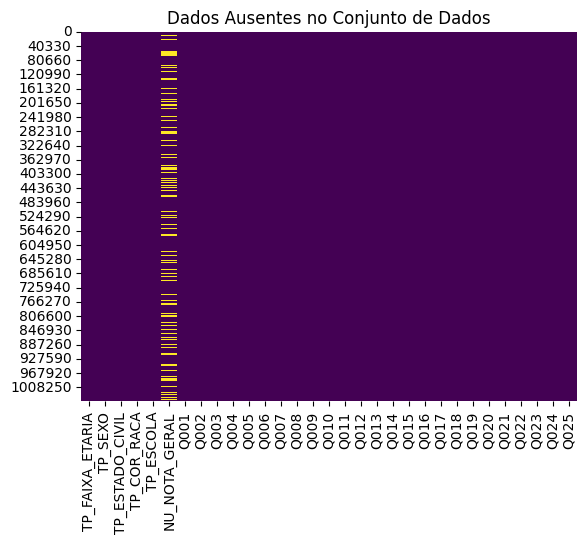

In [ ]:
# Verificar dados ausentes
missing_data = df.isnull().sum()

# Visualização dos dados ausentes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Dados Ausentes no Conjunto de Dados')
plt.show()

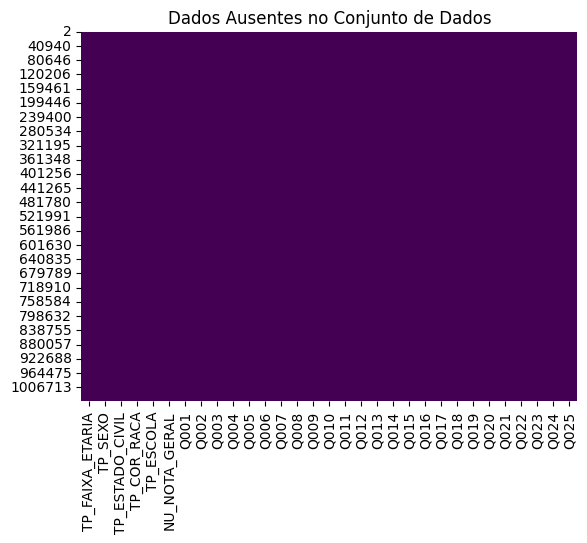

In [ ]:
# Eliminando linhas com dados ausentes
df.dropna(subset=['NU_NOTA_GERAL'], inplace=True)

# Verificar dados ausentes
missing_data = df.isnull().sum()

# Visualização dos dados ausentes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Dados Ausentes no Conjunto de Dados')
plt.show()

In [ ]:
df.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,NU_NOTA_GERAL,Q001,Q002,Q003,Q004,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,5,F,1,2,1,558.2,E,F,A,D,...,A,A,A,A,A,A,C,A,A,B
3,6,M,1,3,1,394.6,C,A,A,B,...,B,A,A,C,A,A,C,B,B,B
7,6,F,1,2,1,414.1,E,E,B,B,...,B,A,A,C,A,A,E,A,A,B
9,4,F,1,3,1,438.1,E,E,B,B,...,A,A,A,B,A,A,B,A,A,B
11,2,F,1,1,3,576.7,E,E,B,A,...,A,A,A,B,A,A,C,A,A,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785428 entries, 2 to 1048574
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TP_FAIXA_ETARIA  785428 non-null  int64  
 1   TP_SEXO          785428 non-null  object 
 2   TP_ESTADO_CIVIL  785428 non-null  int64  
 3   TP_COR_RACA      785428 non-null  int64  
 4   TP_ESCOLA        785428 non-null  int64  
 5   NU_NOTA_GERAL    785428 non-null  float64
 6   Q001             785428 non-null  object 
 7   Q002             785428 non-null  object 
 8   Q003             785428 non-null  object 
 9   Q004             785428 non-null  object 
 10  Q005             785428 non-null  int64  
 11  Q006             785428 non-null  object 
 12  Q007             785428 non-null  object 
 13  Q008             785428 non-null  object 
 14  Q009             785428 non-null  object 
 15  Q010             785428 non-null  object 
 16  Q011             785428 non-null  obj

In [ ]:
df.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,NU_NOTA_GERAL,Q005
count,785428.000000,785428.000000,785428.000000,785428.000000,785428.000000,785428.000000
mean,4.382695,1.025056,2.086428,1.501387,534.826809,3.796534
std,3.220917,0.336237,1.011530,0.598559,90.945223,1.366122
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,477.200000,3.000000
50%,3.000000,1.000000,2.000000,1.000000,531.800000,4.000000
75%,5.000000,1.000000,3.000000,2.000000,592.900000,4.000000
max,20.000000,4.000000,5.000000,3.000000,855.800000,20.000000


### Visualizações Gráficas:

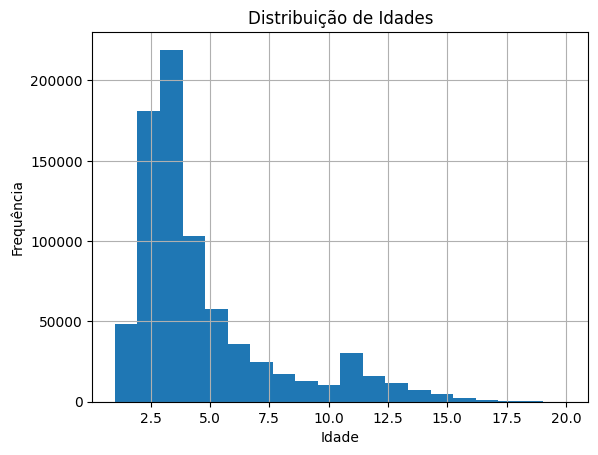

In [ ]:
# Histogramas
df['TP_FAIXA_ETARIA'].hist(bins=20)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

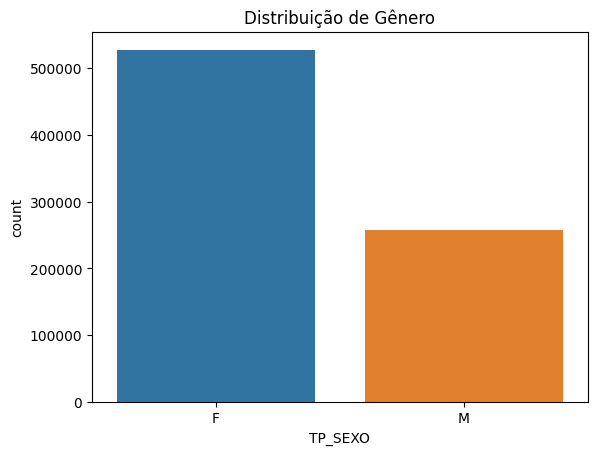

In [ ]:
# Gráficos de barra
sns.countplot(x='TP_SEXO', data=df)
plt.title('Distribuição de Gênero')
plt.show()

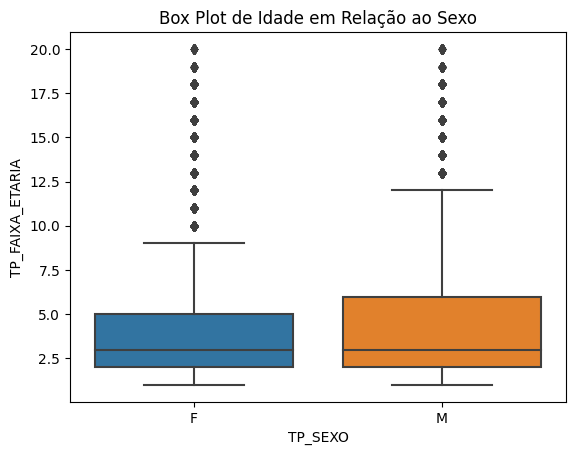

In [ ]:
# Box plot de faixa etária em relação ao sexo
sns.boxplot(x='TP_SEXO', y='TP_FAIXA_ETARIA', data=df)
plt.title('Box Plot de Idade em Relação ao Sexo')
plt.show()

### Correlações:

In [ ]:
# Matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

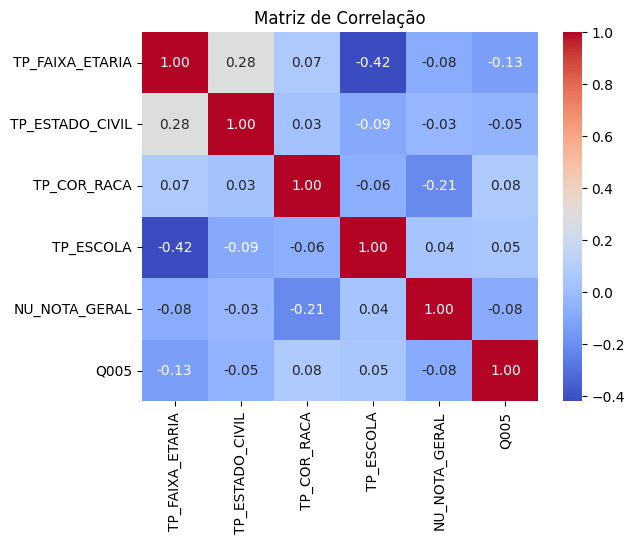

In [ ]:
# Mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# KNN

## 2.  Divisão dos Dados e Pré-processamento: KNN

In [ ]:
# Definindo intervalos e rótulos para as classes
intervalos = [0, 500, 700, 1000]
rotulos = ['Baixa', 'Média', 'Alta']

# Criando a coluna 'Classe' no DataFrame com base nas notas
df['Classe'] = pd.cut(df['NU_NOTA_GERAL'], bins=intervalos, labels=rotulos)

# Especifica a proporção de linhas a serem mantidas (por exemplo, 0.5 para manter metade)
sample_ratio = 0.5

# Obtém uma amostra aleatória do DataFrame
sampled = df.sample(frac=sample_ratio, random_state=42)

# Definindo as features (X) e os rótulos (y)
X = df.drop('Classe', axis=1)  # Features, excluindo a coluna alvo 'Classe'
y = df['Classe']  # Rótulos, coluna alvo 'Classe'

# Definindo as features (A) e os rótulos (b)
A = sampled.drop('Classe', axis=1)  # Features, excluindo a coluna alvo 'Classe'
b = sampled['Classe']  # Rótulos, coluna alvo 'Classe'

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
# Realizando o pré-processamento:

## Remover linhas que contêm valores NaN
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]

## Convertendo variáveis categóricas em numéricas

### Lista de colunas categóricas
colunas_categoricas = ['TP_SEXO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007',
                       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
                       'Q022', 'Q023', 'Q024', 'Q025']

### Inicializar o LabelEncoder
label_encoder = LabelEncoder()

### Iterar sobre as colunas categóricas e aplicar a transformação
for coluna in colunas_categoricas:
    X_train[coluna] = label_encoder.fit_transform(X_train[coluna])
    X_test[coluna] = label_encoder.fit_transform(X_test[coluna])

## Ajustando os parâmetros do modelo para otimizar o desempenho no conjunto de validação.

In [ ]:

# Dividindo os dados em conjuntos de treinamento e teste
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.9, random_state=42)

# Realizando o pré-processamento:

## Remover linhas que contêm valores NaN
b_train = b_train.dropna()
A_train = A_train.loc[b_train.index]

b_test = b_test.dropna()
A_test = A_test.loc[b_test.index]

## Convertendo variáveis categóricas em numéricas

### Lista de colunas categóricas
colunas_categoricas = ['TP_SEXO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007',
                       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
                       'Q022', 'Q023', 'Q024', 'Q025']

### Inicializar o LabelEncoder
label_encoder = LabelEncoder()

### Iterar sobre as colunas categóricas e aplicar a transformação
for coluna in colunas_categoricas:
    A_train[coluna] = label_encoder.fit_transform(A_train[coluna])
    A_test[coluna] = label_encoder.fit_transform(A_test[coluna])

# Definindo os parâmetros a serem ajustados
param_grid = {
    'n_neighbors': [5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Criando um modelo KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Ajustando o modelo aos dados de treinamento
grid_search.fit(A_train, b_train)

# Exibindo os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


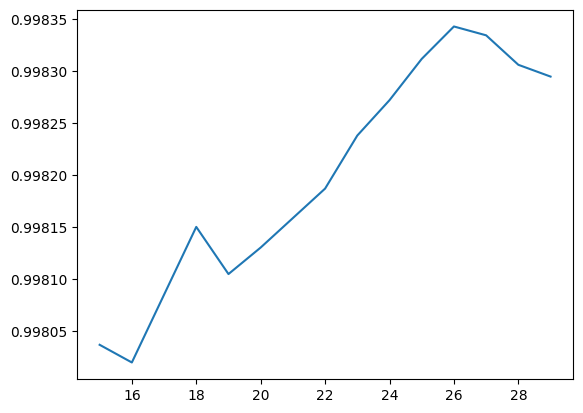

In [ ]:
k_range = range(15,30)
scores = {}
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn.fit(A_train, b_train)
  b_pred = knn.predict(A_test)
  scores[k] = metrics.accuracy_score(b_test,b_pred)

plt.plot(k_range,list(scores.values()))

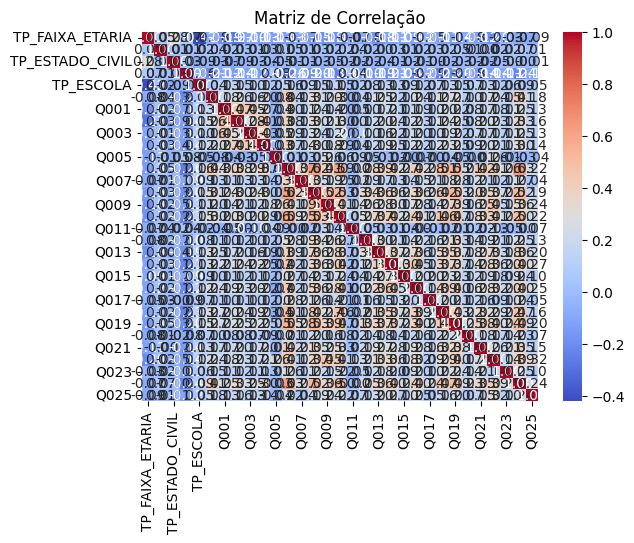

In [ ]:
# Matriz de correlação
correlation_matrix = X_train.corr(numeric_only=True)

# Mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

## Avaliação do Modelo

## 3. Escolha do Modelo e Parâmetros para o treinamento: KNN


In [ ]:
# Inicializando o classificador KNN
knn_classifier = KNeighborsClassifier(algorithm='auto', n_neighbors=26, p=2, weights='uniform')

# Treinando o modelo
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=26)

## 4. Avaliação do Modelo: KNN

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = knn_classifier.predict(X_test)

# Avaliando a acurácia e outras métricas
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Exibindo o relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia: 0.9989368564093282
Relatório de Classificação:
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00     15419
       Baixa       1.00      1.00      1.00    137197
       Média       1.00      1.00      1.00    239617

    accuracy                           1.00    392233
   macro avg       1.00      1.00      1.00    392233
weighted avg       1.00      1.00      1.00    392233



# Random Forest

## 2.  Divisão dos Dados e Pré-processamento: Random Forest

In [ ]:
# Divisão dos dados em treinamento e validação
X_train, X_train, y_train, y_train = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
# Realizando o pré-processamento:

## Remover linhas que contêm valores NaN
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

## Convertendo variáveis categóricas em numéricas

### Lista de colunas categóricas
colunas_categoricas = ['TP_SEXO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007',
                       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
                       'Q022', 'Q023', 'Q024', 'Q025']

### Inicializar o LabelEncoder
label_encoder = LabelEncoder()

### Iterar sobre as colunas categóricas e aplicar a transformação
for coluna in colunas_categoricas:
    X_train[coluna] = label_encoder.fit_transform(X_train[coluna])
    X_train[coluna] = label_encoder.fit_transform(X_train[coluna])

## Ajustando os parâmetros do modelo para otimizar o desempenho no conjunto de validação.

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.9, random_state=42)

# Realizando o pré-processamento:

## Remover linhas que contêm valores NaN
b_train = b_train.dropna()
A_train = A_train.loc[b_train.index]

b_test = b_test.dropna()
A_test = A_test.loc[b_test.index]

## Convertendo variáveis categóricas em numéricas

### Lista de colunas categóricas
colunas_categoricas = ['TP_SEXO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007',
                       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
                       'Q022', 'Q023', 'Q024', 'Q025']

### Inicializar o LabelEncoder
label_encoder = LabelEncoder()

### Iterar sobre as colunas categóricas e aplicar a transformação
for coluna in colunas_categoricas:
    A_train[coluna] = label_encoder.fit_transform(A_train[coluna])
    A_test[coluna] = label_encoder.fit_transform(A_test[coluna])

# Definir os parâmetros a serem ajustados
param_grid = {
    'n_estimators': [150, 175, 200],
    'max_depth': [12, 14, 16],
    'min_samples_split': [12, 15, 17],
    'min_samples_leaf': [1, 2, 3]
}

# Criar um modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Criar um objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Ajustar o modelo aos dados de treinamento
grid_search.fit(A_train, b_train)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 200}


## 3. Escolha do Modelo e Treinamento: Random Forest


In [ ]:
# Escolha do algoritmo de classificação:

## Escolha do modelo e ajuste de parâmetros
model = RandomForestClassifier(n_estimators=200, max_depth=16, min_samples_split=15, min_samples_leaf=1, random_state=42)

## Treinamento do modelo
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=15, n_estimators=200,
                       random_state=42)

## 4. Avaliação do Modelo: Random Forest

In [ ]:
# Testar o modelo no conjunto de validação:

## Converter y_val_pred para o tipo de dado categórico
y_val_pred = pd.Categorical(y_train, categories=y_train.cat.categories)

## Previsões no conjunto de validação
y_train_pred = model.predict(X_train)

## Avaliação da precisão do modelo
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Acurácia do modelo: {accuracy}")

## Outras métricas
print("Relatório de Classificação:")
print(classification_report(y_train, y_train_pred))

Acurácia do modelo: 1.0
Relatório de Classificação:
              precision    recall  f1-score   support

        Alta       1.00      1.00      1.00     15419
       Baixa       1.00      1.00      1.00    137197
       Média       1.00      1.00      1.00    239617

    accuracy                           1.00    392233
   macro avg       1.00      1.00      1.00    392233
weighted avg       1.00      1.00      1.00    392233



# Redes Neurais

## 2.  Divisão dos Dados e Pré-processamento: Redes Neurais

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


## Remover linhas que contêm valores NaN
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]

# Lista de colunas categóricas
colunas_categoricas = ['TP_SEXO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007',
                       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
                       'Q022', 'Q023', 'Q024', 'Q025']

# Inicializar o LabelEncoder para X
label_encoder = LabelEncoder()

# Iterar sobre as colunas categóricas e aplicar a transformação para X_train e X_test
for coluna in colunas_categoricas:
    X_train[coluna] = label_encoder.fit_transform(X_train[coluna])
    X_test[coluna] = label_encoder.transform(X_test[coluna])


# Aplicar a transformação para y_train e y_test
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Ajustando os parâmetros do modelo para otimizar o desempenho no conjunto de validação.

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.9, random_state=42)

# Realizando o pré-processamento:

## Remover linhas que contêm valores NaN
b_train = b_train.dropna()
A_train = A_train.loc[b_train.index]

b_test = b_test.dropna()
A_test = A_test.loc[b_test.index]

## Convertendo variáveis categóricas em numéricas

### Lista de colunas categóricas
colunas_categoricas = ['TP_SEXO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007',
                       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
                       'Q022', 'Q023', 'Q024', 'Q025']

### Inicializar o LabelEncoder
label_encoder = LabelEncoder()

### Iterar sobre as colunas categóricas e aplicar a transformação
for coluna in colunas_categoricas:
    A_train[coluna] = label_encoder.fit_transform(A_train[coluna])
    A_test[coluna] = label_encoder.fit_transform(A_test[coluna])



# Função para criar o modelo Keras
def create_model(activation='relu'):
    model = keras.Sequential([
        keras.layers.Dense(128, activation=activation, input_shape=(A_train.shape[1],)),
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(32, activation=activation),
        keras.layers.Dense(3, activation='softmax')
    ])
    # Compilando o modelo
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)

# Definir os parâmetros a serem ajustados
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 150],
    'optimizer': ['adam', 'sgd'],
}

# Criar um objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Ajustar o modelo aos dados de treinamento
grid_result = grid_search.fit(A_train, b_train)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_result.best_params_)

Epoch 1/150
1225/1225 [==============================] - 2s 1ms/step - loss: 0.9279 - accuracy: 0.6898
Epoch 2/150
1225/1225 [==============================] - 2s 2ms/step - loss: 0.5737 - accuracy: 0.7653
Epoch 3/150
1225/1225 [==============================] - 2s 1ms/step - loss: 0.4653 - accuracy: 0.7985
Epoch 4/150
1225/1225 [==============================] - 2s 1ms/step - loss: 0.4155 - accuracy: 0.8204
Epoch 5/150
1225/1225 [==============================] - 2s 1ms/step - loss: 0.3997 - accuracy: 0.8267
Epoch 6/150
1225/1225 [==============================] - 2s 1ms/step - loss: 0.3694 - accuracy: 0.8424
Epoch 7/150
1225/1225 [==============================] - 2s 1ms/step - loss: 0.3452 - accuracy: 0.8517
Epoch 8/150
1225/1225 [==============================] - 2s 2ms/step - loss: 0.3158 - accuracy: 0.8677
Epoch 9/150
1225/1225 [==============================] - 2s 2ms/step - loss: 0.2857 - accuracy: 0.8779
Epoch 10/150
1225/1225 [==============================] - 2s 1ms/step - l

## 3. Escolha do Modelo e Treinamento: Redes Neurais

In [ ]:
# Definindo o modelo de rede neural
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treine o modelo
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1)

Epoch 1/150
11052/11052 [==============================] - 44s 4ms/step - loss: 0.0667 - accuracy: 0.9715 - val_loss: 0.0338 - val_accuracy: 0.9857
Epoch 2/150
11052/11052 [==============================] - 24s 2ms/step - loss: 0.0327 - accuracy: 0.9861 - val_loss: 0.0268 - val_accuracy: 0.9879
Epoch 3/150
11052/11052 [==============================] - 25s 2ms/step - loss: 0.0258 - accuracy: 0.9890 - val_loss: 0.0223 - val_accuracy: 0.9900
Epoch 4/150
11052/11052 [==============================] - 26s 2ms/step - loss: 0.0228 - accuracy: 0.9901 - val_loss: 0.0221 - val_accuracy: 0.9904
Epoch 5/150
11052/11052 [==============================] - 28s 3ms/step - loss: 0.0206 - accuracy: 0.9911 - val_loss: 0.0203 - val_accuracy: 0.9911
Epoch 6/150
11052/11052 [==============================] - 25s 2ms/step - loss: 0.0190 - accuracy: 0.9918 - val_loss: 0.0180 - val_accuracy: 0.9927
Epoch 7/150
11052/11052 [==============================] - 26s 2ms/step - loss: 0.0176 - accuracy: 0.9925 - val_

## 4. Avaliação do Modelo: Redes Neurais

In [ ]:
# Testar o modelo no conjunto de validação:

# Avaliando o modelo no conjunto de teste
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)  # Convertendo as probabilidades em classes

# Avaliando a acurácia e outras métricas
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia do modelo: {accuracy}")

classification_report_result = classification_report(y_test, y_test_pred)
print("Relatório de Classificação:")
print(classification_report_result)

12258/12258 [==============================] - 18s 1ms/step
Acurácia do modelo: 0.9951916335443474
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15419
           1       1.00      0.99      1.00    137197
           2       1.00      1.00      1.00    239617

    accuracy                           1.00    392233
   macro avg       0.99      0.99      0.99    392233
weighted avg       1.00      1.00      1.00    392233



# 5. Salvar os Modelos Treinados:

In [ ]:
'''
from google.colab import files

# Salvando Modelo Treinado:
joblib.dump(model, 'Atividade2.pkl')

files.download('Atividade2.pkl')
'''

print('Finalizado')